<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/LabWK_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Dataset / Creating the DataFrame
df = pd.read_csv('/content/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
# Renaiming te Columns
df.columns = ['Month', 'Passengers Number']
df

,Month,Passengers Number
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# Setting Month as Index
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format= True)
df.set_index('Month', inplace=True)
df

/tmp/ipython-input-3774092437.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format= True)


,Passengers Number
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


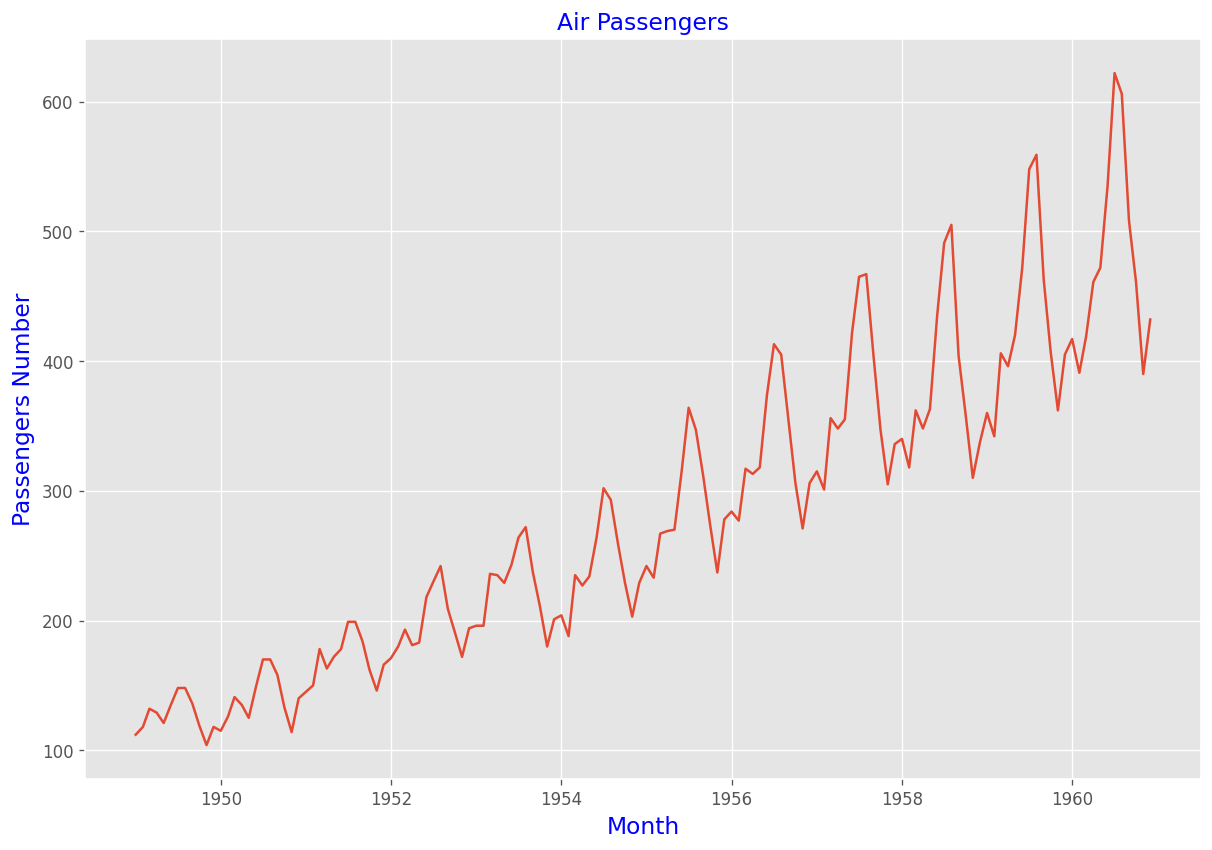

In [6]:
# Plotting the TS Dataseyt Air Passengers
plt.style.use('ggplot')
plt.figure(figsize=(12,8), dpi = 120)
plt.xlabel('Month', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers Number', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.plot(df)
plt.show()



In [7]:
# Let's Run the ADF and KPSS Tests to find out whether the TS is Stationary or Non-Stationary.
from statsmodels.tsa.stattools import adfuller, kpss
adf_test = adfuller(df['Passengers Number'])
print('ADF p-value',  adf_test[1])   # p-value > 0.05 ===> TS non-stationary
kpss_test = kpss(df['Passengers Number'])
print('KPSS p-value',  kpss_test[1])  # p-value < 0.05 ===> TS non-stationary

"""
In this case the TS being non-stationary, we can run ARIMA model to make it stationary.
AutoRegressive Integrated Moving Average (ARIMA)
AR (p) I(d) MA(q)
ADF = Augmented Dickey Fuller
KPSS = Kwiatkowski-Phillips-Schmidt-Shin
"""

ADF p-value 0.991880243437641
KPSS p-value 0.01


/tmp/ipython-input-2942887921.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df['Passengers Number'])


<Figure size 1440x960 with 0 Axes>

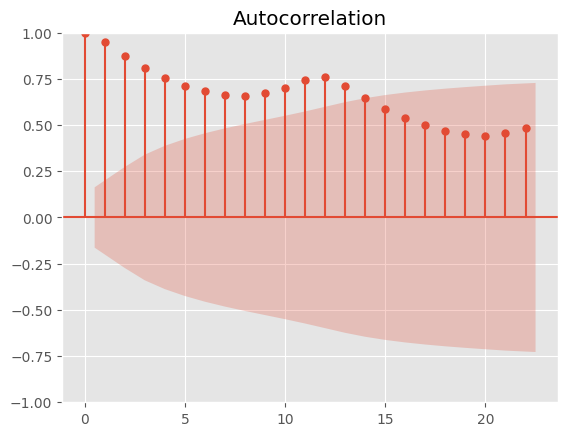

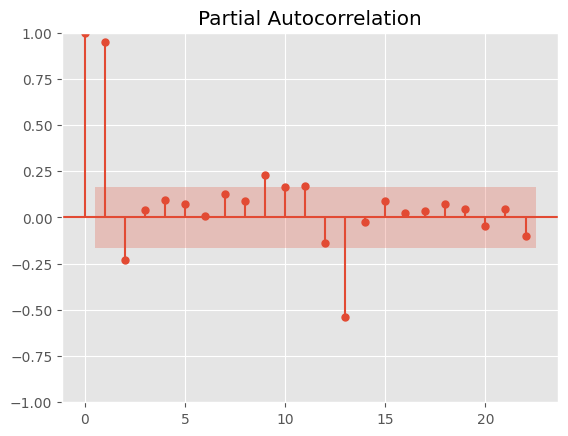

<Figure size 1440x960 with 0 Axes>

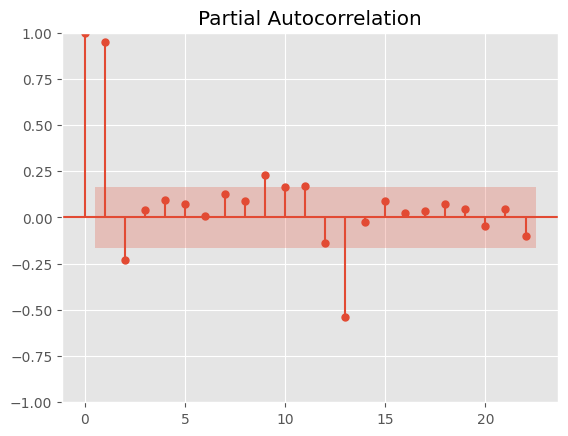

In [8]:
# Plot the ACF and PACF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8), dpi = 120)
plot_acf(df['Passengers Number']) # Several laggs are significant, therefore we will have to select between them and q = 1, 2, 3
plot_pacf(df['Passengers Number']) # Several laggs are significant, therefore we will have to select between them and p = 1, 2, 3
plt.show()

<Figure size 1440x960 with 0 Axes>

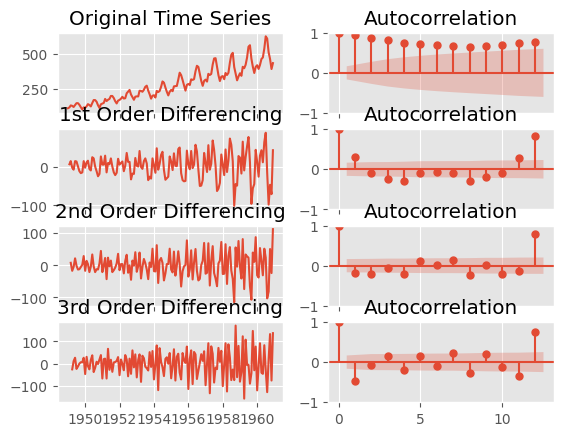

In [11]:
# Let's implement the differrncing of order d
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8), dpi = 120)

# Plotting the Oiginal Time Series
fig, axes = plt. subplots(4, 2, sharex='col')
axes[0,0].plot(df['Passengers Number'])
axes[0,0].set_title('Original Time Series'); axes[0,0].set_title('Original Time Series')
plot_acf(df['Passengers Number'], lags = 12, ax = axes[0,1])

# Differencing 1st Order
axes[1,0].plot(df['Passengers Number'].diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Passengers Number'].diff().dropna(), lags = 12, ax = axes[1,1])  #

"""
 From the plots, differencing of order 1 is sufficient to make the TS stationary. Therefore d= 1
 Additionally, we have thge different values to plot our ARIMA(p,d,q) and they are:
 p = 1, 2, 3
 d = 1
 q = 1, 2, 3
ARIMA (1,1,0) - ARIMA(0,1,1) - ARIMA(0,1,2) - ARIMA(2,1,0), ARIMA(1,1,1) - ARIMA(1,1,2) - ARIMA(2,1,1) - ARIMA(2,1,2)
 """

# Differencing 2nd Order
axes[2,0].plot(df['Passengers Number'].diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Passengers Number'].diff().diff().dropna(), lags = 12, ax = axes[2,1])

# 3rd order Differencing
axes[3,0].plot(df['Passengers Number'].diff().diff().diff()); axes[3,0].set_title('3rd Order Differencing')
plot_acf(df['Passengers Number'].diff().diff().diff().dropna(), lags = 12, ax = axes[3,1])

plt.show()

In [14]:
# Let's plot different ARIMA models and select the best one based on the values of AIC and BIC
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Passengers Number'], order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Passengers Number   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Wed, 07 Jan 2026   AIC                           1401.852
Time:                        12:44:33   BIC                           1407.778
Sample:                    01-01-1949   HQIC                          1404.260
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 4.91
Prob(Q):                              0.42   Prob(JB):                         0.09
Heteroskedasticity (H):               8.35   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Passengers Number'], order = (0,1,1))
model_fit = model.fit()
model_fit.summary()
"""
Comparing the ARIMA (p,d,q) models is based on the values of AIC and BIC and the smaller the better the model
"""

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Passengers Number   No. Observations:                  144
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -696.629
Date:                Wed, 07 Jan 2026   AIC                           1397.258
Time:                        12:45:32   BIC                           1403.183
Sample:                    01-01-1949   HQIC                          1399.665
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4027      0.077      5.252      0.000       0.252       0.553
sigma2       996.0870    108.453      9.184      0.000     783.522    1208.652
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.79   Prob(JB):                         0.40
Heteroskedasticity (H):               8.04   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""